In [16]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from numpy.linalg import norm

In [1]:
def read_dat(fdat):
    df = {}
    with open(fdat, 'r') as fid:
        for row in fid.readlines():
            row = row.split()
            if row[0] == 'add':
                uid = int(row[1])
                x = int(row[2])
                y = int(row[3])
                z = int(row[4])
                df[uid] = {'p':[(x,y,z)], 'bind':False}
            elif row[0] == 'bind':
                df[uid]['bind'] = True
            elif row[0] == 'move':
                uid = int(row[1])
                x = int(row[2])
                y = int(row[3])
                z = int(row[4])
                df[uid]['p'].append((x,y,z))         
    return df 

In [2]:
df = read_dat('dla.dat')

[Text(0.5, 0, 'uid'), Text(0, 0.5, 'launch distance')]

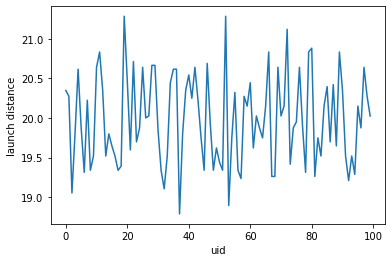

In [30]:
P = []
for uid in df:
    P.append(np.array(df[uid]['p'][0])) # launch position
D = [norm(P[0] - P[i]) for i in range(1,len(P))]
ax = sns.lineplot(x=np.arange(len(D)), y=D)
ax.set(xlabel='uid', ylabel='launch distance')

In [43]:
Dmin, Dmax = [], []
p0 = np.array(df[0]['p'][0])
for uid in df:
    dmin = np.inf    
    dmax = 0
    P = np.array(df[uid]['p'])
    for p in P:
        d = norm(p - p0)
        if d > dmax:
            dmax = d
        if d < dmin:
            dmin = d
    Dmin.append(dmin)
    Dmax.append(dmax)
D = {'uid':np.arange(len(Dmin)), 'dmin':Dmin, 'dmax':Dmax}

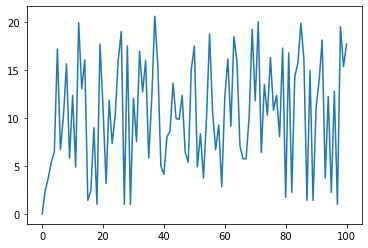

In [56]:
ax = sns.lineplot(x=D['uid'], y=D['dmin'])
#ax = sns.lineplot(x=D['uid'], y=D['dmax'])